# $Q^2$ from inclusive ($\mu$) vs. exclusive ($\mu,p$)
where

$$
E_{\nu}^{QE} = 
\frac{2M'_n E_{\mu} - \left( (M'_n)^2 + m_{\mu}^2 - M_p^2 \right)}
{2 \left(M'_n - E_{\mu} + p_{\mu}\cos(\theta_\mu)\right)}
$$

$$
Q^2_{inclusive} = -m_{\mu}^2 + 2E_{\nu}^{QE}\left( E_{\mu} - p_{\mu}\cos(\theta_\mu) \right)
$$

and $M'_n = M_n - 0.034 \simeq 0.0905$ GeV/c$^2$

In [1]:
import sys; sys.path.insert(0, '../../../'); 
from ccqe_notebook_tools import * 
from mupClassification_notebooks import *
from onbeam_offbeam_notebooks import *
import json
%matplotlib inline

versions:
{   'OffBeam': 'prod_reco_optfilter_extbnb_v12_mcc8_dev',
    'OnBeam': 'prod_reco_optfilter_bnb_v12_unblind_mcc8',
    'Overlay': 'prodgenie_bnb_nu_uboone_overlay_mcc8.11_reco2',
    'data date': '2018_05_11',
    'date': '2018_05_11',
    'overlay date': '2018_05_11'}
OffBeam_scaling: 0.706302660161 = N(on beam)/N(off beam) before SwT
f(POT): 0.0512441465374 = N(POT on beam)/N(POT MC)


In [2]:
figures_path = '/Users/erezcohen/Desktop/Projects/uBoone/write-ups/mAextraction/Figures/EventWeight/'

In [3]:
versions['overlay date'] = '2018_08_01'
versions['Overlay'] = 'prodgenie_bnb_nu_uboone_overlay_mcc8.11_reco2'
OverlaySamples = load_samples(date=versions['overlay date'],filename=versions['Overlay']+'_'+versions['overlay date']+'_vertices')
cuts_order  = ['no cut','Chi2Proton','MatchedFlash','length','non-collinearity','vertex activity','delta phi','Pt & delta phi']
reducedOverlay,pureffOverlay,pureffNumbers = apply_cuts_to_overlay(OverlaySamples=OverlaySamples, cuts_order=cuts_order)
print 'applied cuts to overlay'
overlay_scaling = get_samples_scaling( N_total='MC(tot) x POT', debug=0, OverlaySubsamples=OverlaySamples, f_POT=Nevents['f(POT)'])

285038 ccqe candidate pairs, 187286 in FV
49951 are 1mu-1p, 26.7%
41680 are other pairs, 22.3%
95655 are cosmic, 51.1%
--------------------------------------------------------------
24119 are CC 1p 0pi, 12.9%
I finished loading overlay samples. We have in total 285038 pairs
applied cuts to overlay


# $Q^2_{inclusive}$


In [31]:
cut = 'Pt & delta phi'
selected_overlay = dict()
for pair_type in pair_types[0:4]:
    sam = reducedOverlay[cut][pair_type]
    sam['Ev_inclusive'] = ((2.*0.905*sam['reco_Emu'] - (np.square(0.905) + np.square(0.1065) - np.square(0.938)))
                       /(2.*(0.905 - sam['reco_Emu'] + sam['reco_Pmu']*np.cos(sam['reco_Pmu_theta']))))
    sam['Q2_inclusive'] = -np.square(0.1065) + 2.*sam['Ev_inclusive']*(sam['reco_Emu'] - sam['reco_Pmu']*np.cos(sam['reco_Pmu_theta']))
    selected_overlay[pair_type] = sam
selected_overlay_concat = pd.concat([selected_overlay['1mu-1p'],selected_overlay['cosmic'],selected_overlay['other pairs']])    

/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


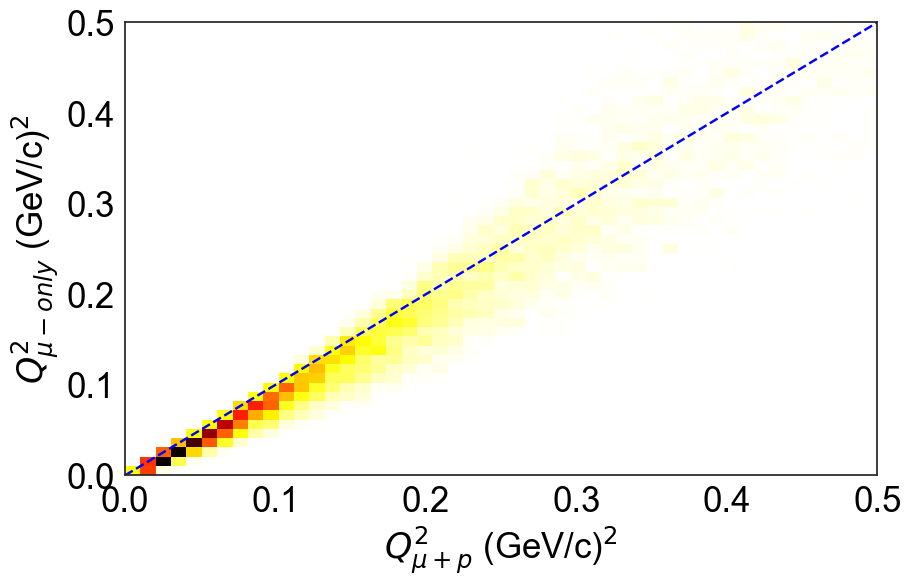

In [18]:
fig,ax=plt.subplots(figsize=(9.708,6))
plot_2d_hist( sam['reco_Q2'], sam['Q2_inclusive'],bins=linspace(0,0.5,50),ax=ax);
ax.plot([0,0.5],[0,0.5],'--',color='blue')
set_axes(ax,r'$Q^2_{\mu + p}$ (GeV/c)$^2$',r'$Q^2_{\mu-only}$ (GeV/c)$^2$')

# data?

In [19]:
OnBeam = pd.concat([pd.read_csv(vertices_files_path+'/'+versions['data date']+'/'+versions['OnBeam']+'_04_'+versions['data date']+'_vertices.csv')
                    ,pd.read_csv(vertices_files_path+'/'+versions['data date']+'/'+versions['OnBeam']+'_05_'+versions['data date']+'_vertices.csv')])
OnBeamFV = sample_in_FV(OnBeam)
reducedOnBeam,BeamOnNumbers = apply_cuts_to_data(OnBeamFV=OnBeamFV,cuts_order=cuts_order)
print 'applied cuts to beam-on'

applied cuts to beam-on


In [20]:
selected_events = reducedOnBeam['Pt & delta phi']

In [22]:
sam = selected_events
sam['reco_Emu'] = np.sqrt(np.square(sam['reco_Pmu'])+np.square(0.1056))
sam['Ev_inclusive'] = ((2.*0.905*sam['reco_Emu'] - (np.square(0.905) + np.square(0.1065) - np.square(0.938)))
                       /(2.*(0.905 - sam['reco_Emu'] + sam['reco_Pmu']*np.cos(sam['reco_Pmu_theta']))))
sam['Q2_inclusive'] = -np.square(0.1065) + 2.*sam['Ev_inclusive']*(sam['reco_Emu'] - sam['reco_Pmu']*np.cos(sam['reco_Pmu_theta']))

/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/s

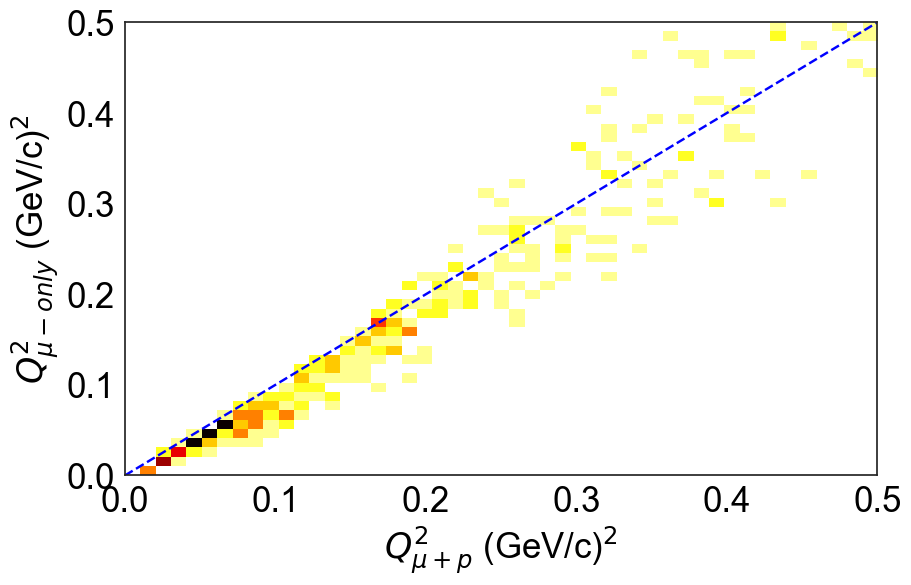

In [23]:
fig,ax=plt.subplots(figsize=(9.708,6))
plot_2d_hist( sam['reco_Q2'], sam['Q2_inclusive'],bins=linspace(0,0.5,50),ax=ax);
ax.plot([0,0.5],[0,0.5],'--',color='blue')
set_axes(ax,r'$Q^2_{\mu + p}$ (GeV/c)$^2$',r'$Q^2_{\mu-only}$ (GeV/c)$^2$')

350 events in the data


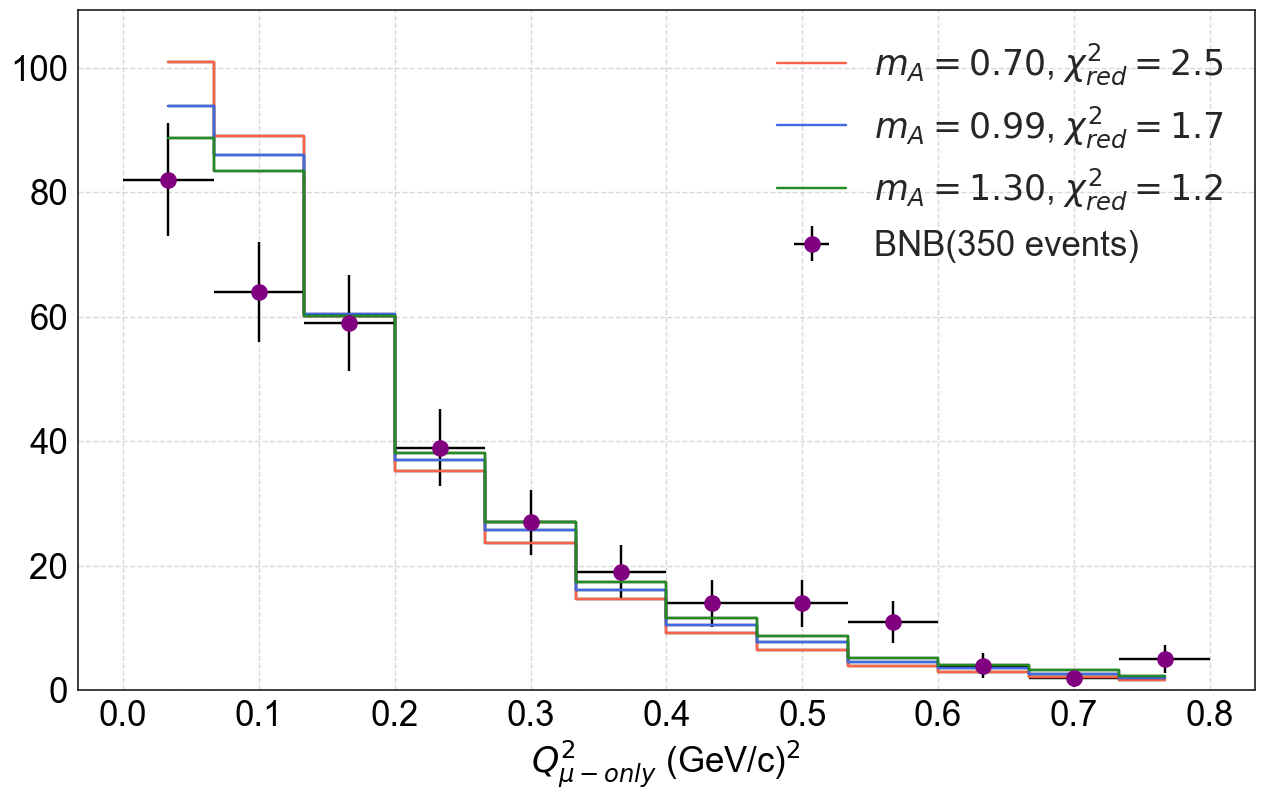

In [41]:
fig=plt.figure(figsize=(12.944,8))
ax = fig.add_subplot(1,1,1)
print len(selected_events),'events in the data'
var = 'Q2_inclusive'
bins = bins=linspace(0,0.8,13); mid=0.5*(bins[1:]+bins[:-1])
chi2_xrange = (0,1)
h_OnBeam,h_OnBeam_err=plot_OnBeam(OnBeamSample=selected_events,color='purple',var=var, bins=bins, markersize=12
                                      , ax=ax, do_return_h=True)    
for mA,color in zip( [0.7,0.99,1.3],['tomato','royalblue','forestgreen']):
    name = '%.0f'%(mA*100) 
    h_overlay, h_overlay_err = plot_stacked_MCsamples( OverlaySamples=selected_overlay,stackLabel=None
                                                          , weights_var='evwgh_mA'+name+'_Genie'
                                                          , norm=len(selected_events)
                                                          , do_draw=True, ax=ax
                                                          , overlay_scaling=overlay_scaling
                                                          , var=var, bins=bins 
                                                         )
    if chi2_xrange is not None:
        chi2 , ndf = chi2_two_histograms( bins=bins, chi2_xrange=chi2_xrange
                                             , h1=h_OnBeam , h1err=h_OnBeam_err
                                             , h2=h_overlay ,  h2err=h_overlay_err
                                             , debug=0 if mA==0.4 else 0)
    plt.step( mid , h_overlay, where='mid',color=color, label='$m_A=%.2f$'%mA+', $\chi^2_{red}=%.1f$'%(chi2/ndf))
set_axes(ax,r'$Q^2_{\mu-only}$ (GeV/c)$^2$','',do_add_grid=False,alpha_grid=1,ylim=(0,1.2*np.max(h_OnBeam+h_OnBeam_err))
             ,do_add_legend=True,legend_loc='upper right')